C:\Users\kushagra\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


[*********************100%%**********************]  6 of 6 completed


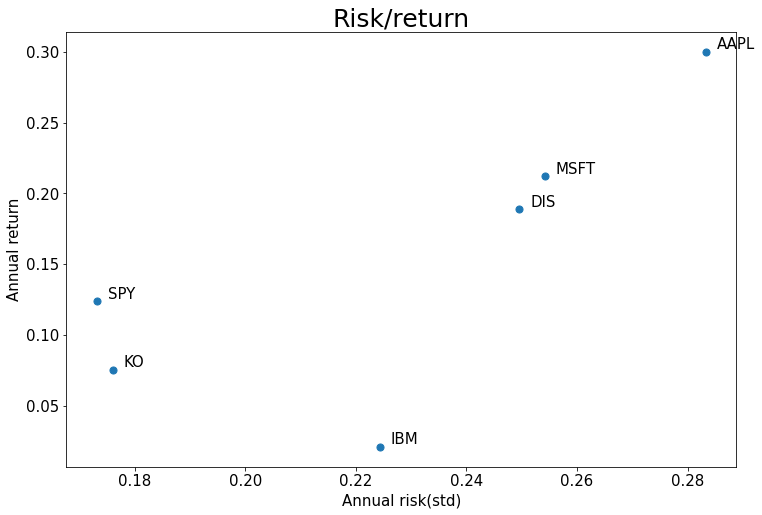

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
ticker=["SPY","AAPL","KO","IBM","DIS","MSFT"]
stocks = yf.download(ticker, start = "2010-01-01",end ="2021-01-01")
close=stocks.loc[:,"Close"].copy()
normclose=close.div(close.iloc[0]).mul(100)
ret=close.pct_change().dropna()
ret.head()
ret.describe().T
summary=ret.describe().T.loc[:,["mean","std"]]
summary
summary["mean"]=summary["mean"]*252
summary["std"]=summary["std"]*np.sqrt(252)
summary
summary.plot.scatter(x="std",y="mean",figsize=(12,8),s=50,fontsize=15)
for i in summary.index:
    plt.annotate(i,xy=(summary.loc[i,"std"]+0.002,summary.loc[i,"mean"]+0.002),size=15)
plt.xlabel("Annual risk(std)",fontsize = 15)
plt.ylabel("Annual return",fontsize = 15)
plt.title("Risk/return",fontsize=25)
plt.show()


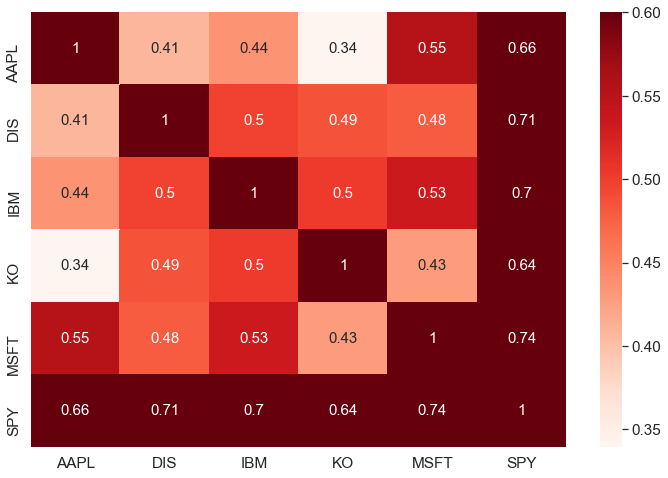

In [3]:
ret
ret.cov()
ret.corr()
import seaborn as sns
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(ret.corr(),cmap="Reds",annot=True,annot_kws={"size":15},vmax=0.6)
plt.show()

[*********************100%%**********************]  1 of 1 completed


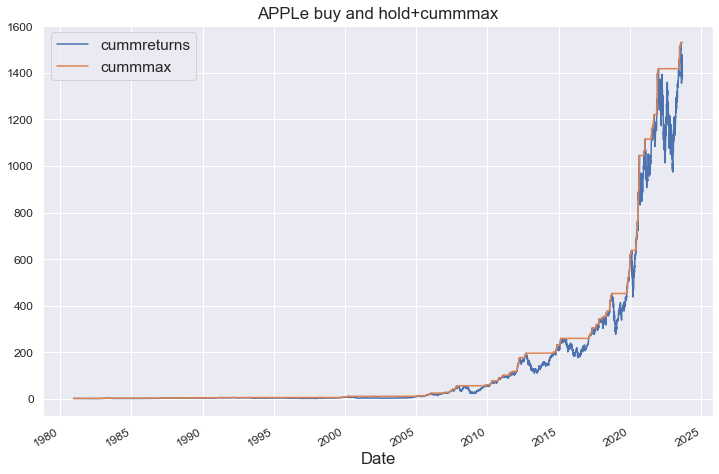

In [7]:
apple=yf.download("AAPL")
apple=apple.Close.to_frame()
apple
apple["d_returns"]=np.log(apple.div(apple.shift(1)))
apple.dropna(inplace=True)
apple.d_returns.sum()
np.exp(apple.d_returns.sum())
apple["cummreturns"]=apple.d_returns.cumsum().apply(np.exp)
apple.d_returns.mean()*252
apple.d_returns.std()*np.sqrt(252)
apple["cummmax"]=apple.cummreturns.cummax()
apple[["cummreturns","cummmax"]].plot(figsize=(12,8),title="APPLe buy and hold+cummmax", fontsize=12)
plt.show()

<AxesSubplot:title={'center':'AAPLE - SMA50 | SMA100'}, xlabel='Date'>

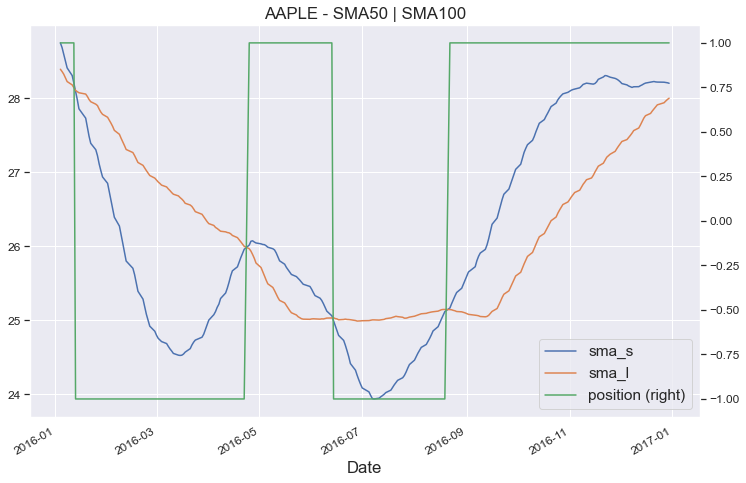

In [9]:
data=apple.Close.loc[(apple.index>='1991-01-01')]
data=data.to_frame()
sma_s=50
sma_l=100
data["sma_s"]=data.Close.rolling(sma_s).mean()
data["sma_l"]=data.Close.rolling(sma_l).mean(
data.dropna(inplace=True)
data["position"]=np.where(data["sma_s"]>data["sma_l"],1,-1)
data.loc["2016",["sma_s","sma_l","position"]].plot(figsize=(12,8),title="AAPLE - SMA{} | SMA{}".format(sma_s,sma_l), fontsize=12,secondary_y="position")